# Data Profiling

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
df = pd.read_excel("Data (Upload).xlsx")

This dataset is data on the COVID-19 Social Assistance program distributed by the DKI Jakarta Provincial Government (Pemprov) and the Ministry of Social Restrictions of the Republic of Indonesia (Kemensos RI) to vulnerable families affected by COVID-19 during the Large-Scale Social Restriction (PSBB) period in Jakarta.

In [48]:
df.head()

,No,Wilayah Kota,Kecamatan,Kelurahan,RW,Penerima (KK),Jadwal Distribusi,Tanggal Distribusi,Sembako
0,1,JAKARTA UTARA,Penjaringan,Penjaringan,RW 01,561.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
1,2,JAKARTA UTARA,Penjaringan,Penjaringan,RW 02,529.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
2,3,JAKARTA UTARA,Penjaringan,Penjaringan,RW 03,881.0,2020-04-09,2020-04-10,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
3,4,JAKARTA UTARA,Penjaringan,Penjaringan,RW 04,369.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
4,5,JAKARTA UTARA,Penjaringan,Penjaringan,RW 05,244.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  2693 non-null   int64         
 1   Wilayah Kota        2693 non-null   object        
 2   Kecamatan           2693 non-null   object        
 3   Kelurahan           2693 non-null   object        
 4   RW                  2693 non-null   object        
 5   Penerima (KK)       2693 non-null   float64       
 6   Jadwal Distribusi   2692 non-null   datetime64[ns]
 7   Tanggal Distribusi  2524 non-null   datetime64[ns]
 8   Sembako             2693 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 189.5+ KB


## Data Cleansing

In [50]:
df['Jadwal Distribusi'] = pd.to_datetime(df['Jadwal Distribusi'])
df['Tanggal Distribusi'] = pd.to_datetime(df['Tanggal Distribusi'])

In [51]:
print(df.dtypes)

No                             int64
Wilayah Kota                  object
Kecamatan                     object
Kelurahan                     object
RW                            object
Penerima (KK)                float64
Jadwal Distribusi     datetime64[ns]
Tanggal Distribusi    datetime64[ns]
Sembako                       object
dtype: object


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No                  2693 non-null   int64         
 1   Wilayah Kota        2693 non-null   object        
 2   Kecamatan           2693 non-null   object        
 3   Kelurahan           2693 non-null   object        
 4   RW                  2693 non-null   object        
 5   Penerima (KK)       2693 non-null   float64       
 6   Jadwal Distribusi   2692 non-null   datetime64[ns]
 7   Tanggal Distribusi  2524 non-null   datetime64[ns]
 8   Sembako             2693 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 189.5+ KB


In [53]:
df.isna().sum() 

No                      0
Wilayah Kota            0
Kecamatan               0
Kelurahan               0
RW                      0
Penerima (KK)           0
Jadwal Distribusi       1
Tanggal Distribusi    169
Sembako                 0
dtype: int64

In [54]:
mean_jadwal = df['Jadwal Distribusi'].mean()
df['Jadwal Distribusi'].fillna(mean_jadwal, inplace=True)

mean_tanggal = df['Tanggal Distribusi'].mean()
df['Tanggal Distribusi'].fillna(mean_tanggal, inplace=True)


In [55]:
df.isna().sum() 

No                    0
Wilayah Kota          0
Kecamatan             0
Kelurahan             0
RW                    0
Penerima (KK)         0
Jadwal Distribusi     0
Tanggal Distribusi    0
Sembako               0
dtype: int64

In [56]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2688    False
2689    False
2690    False
2691    False
2692    False
Length: 2693, dtype: bool

#  Exploratory Data Analysis

In [57]:
df.describe()

,No,Penerima (KK)
count,2693.000000,2693.000000
mean,1369.652804,430.898255
std,794.926322,385.901354
min,1.000000,1.000000
25%,682.000000,151.000000
50%,1361.000000,354.000000
75%,2062.000000,598.000000
max,2745.000000,5685.000000


In [58]:
total_penerima =df['Penerima (KK)'].sum()
print(total_penerima)

1160409.0


In [59]:
total_penerima =df['Penerima (KK)'].sum()
total_per_wilayah = df.groupby('Wilayah Kota')['Penerima (KK)'].sum()

print(total_per_wilayah)

Wilayah Kota
 KEPULAUAN SERIBU      4938.0
JAKARTA BARAT        258828.0
JAKARTA PUSAT        121968.0
JAKARTA SELATAN      229198.0
JAKARTA TIMUR        326772.0
JAKARTA UTARA        218705.0
Name: Penerima (KK), dtype: float64


## Visualization of the number of Top 5 aid recipients (KK) based on District

In [60]:
total_per_Kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum()
Kecamatan_dengan_penerimaan_tertinggi = total_per_Kecamatan.sort_values(ascending=False).index[0:5]

print(Kecamatan_dengan_penerimaan_tertinggi)

Index(['Kramat Jati', 'Cakung', 'Cengkareng', 'Cilincing', 'Kalideres'], dtype='object', name='Kecamatan')


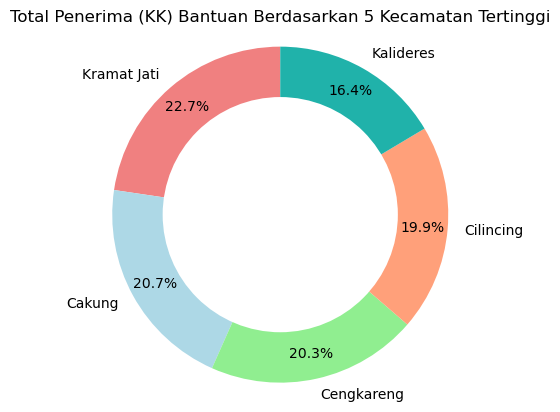

In [61]:
import matplotlib.pyplot as plt
total_per_Kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum()
total_per_Kecamatan = total_per_Kecamatan.sort_values(ascending=False)
top_5_Kecamatan = total_per_Kecamatan.head(5)
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon', 'lightseagreen']
labels = top_5_Kecamatan.index
sizes = top_5_Kecamatan / top_5_Kecamatan.sum() * 100
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(circle)
plt.title('Total Penerima (KK) Bantuan Berdasarkan 5 Kecamatan Tertinggi')
plt.axis('equal') 
plt.show()


Based on the data, the district with the highest number of aid recipients is Kramat Jati District, about 22.7% of the total KK revenue in Kramat Jati, which shows that this area has significant aid needs during the period of PSBB related to COVID-19.

In [62]:
total_per_Kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum()

In [63]:
print(total_per_Kecamatan)

Kecamatan
Cakung                67000.0
Cemapaka Putih         4416.0
Cengkareng            65802.0
Cilandak              15363.0
Cilincing             64482.0
Cipayung              27617.0
Ciracas               38747.0
Duren Sawit           33719.0
Gambir                  272.0
Grogol                37297.0
Grogol\nPetamburan     8493.0
Grogol Petamburan      1443.0
Jagakarsa             35232.0
Jatinegara            46634.0
Johar Baru            15797.0
Kabayoran Lama         4030.0
Kalideres             53252.0
Kebayoran Baru        13999.0
Kebayoran Lama        25459.0
Kebon Jeruk           33574.0
Kelapa Gading          8545.0
Kemayoran              4243.0
Kembangan             27900.0
Koja                  50306.0
Kramat Jati           73394.0
Kuningan                902.0
Makasar               14715.0
Mampang\nPrapatan      7342.0
Mampang Prapatan      11708.0
Matraman               4061.0
Menteng               20353.0
Pademangan            19724.0
Palmerah              13783.0


## Visualization of the highest and lowest number of recipients (KK) based on City Region

In [64]:
total_per_wilayah = df.groupby('Wilayah Kota')['Penerima (KK)'].sum()

wilayah_dengan_penerimaan_tertinggi = total_per_wilayah.sort_values(ascending=False).index

print("Wilayah dengan Penerima (KK) Tertinggi hingga Terendah:")
print(wilayah_dengan_penerimaan_tertinggi)


Wilayah dengan Penerima (KK) Tertinggi hingga Terendah:
Index(['JAKARTA TIMUR', 'JAKARTA BARAT', 'JAKARTA SELATAN', 'JAKARTA UTARA',
       'JAKARTA PUSAT', ' KEPULAUAN SERIBU'],
      dtype='object', name='Wilayah Kota')


In [65]:
total_per_wilayah_sorted = total_per_wilayah[wilayah_dengan_penerimaan_tertinggi]
print(total_per_wilayah_sorted)

Wilayah Kota
JAKARTA TIMUR        326772.0
JAKARTA BARAT        258828.0
JAKARTA SELATAN      229198.0
JAKARTA UTARA        218705.0
JAKARTA PUSAT        121968.0
 KEPULAUAN SERIBU      4938.0
Name: Penerima (KK), dtype: float64


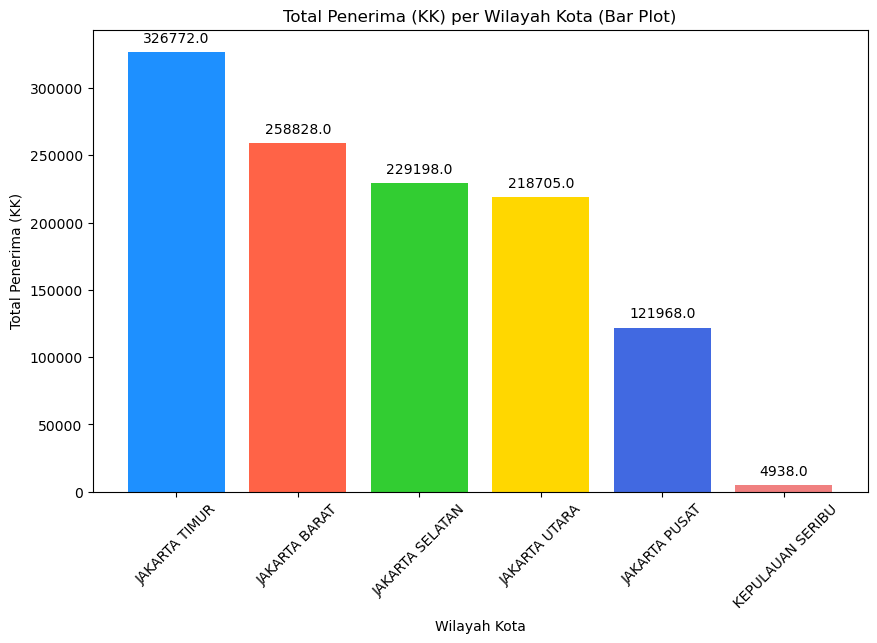

In [66]:
import matplotlib.pyplot as plt
total_per_wilayah = df.groupby('Wilayah Kota')['Penerima (KK)'].sum()
wilayah_dengan_penerimaan_tertinggi = total_per_wilayah.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['dodgerblue', 'tomato', 'limegreen', 'gold', 'royalblue', 'lightcoral']
plt.bar(wilayah_dengan_penerimaan_tertinggi.index, wilayah_dengan_penerimaan_tertinggi, color=colors)
plt.title('Total Penerima (KK) per Wilayah Kota (Bar Plot)')
plt.xlabel('Wilayah Kota')
plt.ylabel('Total Penerima (KK)')
plt.xticks(rotation=45) 

for i, v in enumerate(wilayah_dengan_penerimaan_tertinggi):
    plt.text(i, v + 5000, str(v), color='black', ha='center', va='bottom')

plt.show()


Based on the data generated, you can see a comparison of the number of aid recipients (KK) in various areas of DKI Jakarta. So it can be seen that the city area of East Jakarta had the most aid recipients that year and the lowest aid recipient area was the Thousand Islands with a percentage of 1.51%. This percentage result is calculated based on the total data of aid recipients (KK) in the DKI Jakarta city area. In other words, the Thousand Islands region only has about 1.51% of the number of recipients (KK) in East Jakarta.

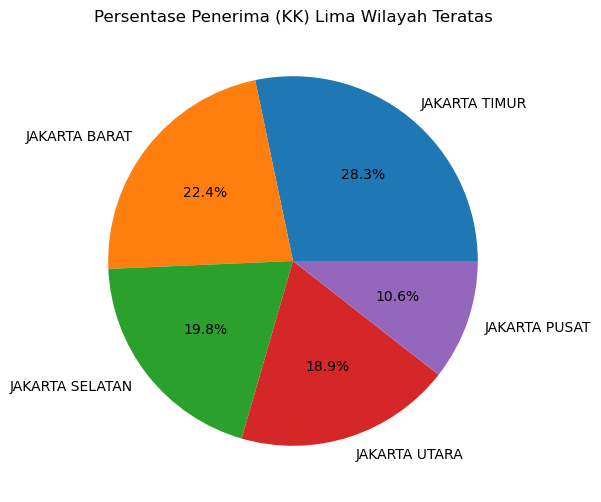

In [67]:
total_per_wilayah = total_per_wilayah.sort_values(ascending=False)
top_5_wilayah = total_per_wilayah.head(5)
plt.figure(figsize=(6, 6))
plt.pie(top_5_wilayah, labels=top_5_wilayah.index, autopct='%1.1f%%')
plt.title('Persentase Penerima (KK) Lima Wilayah Teratas')
plt.show()

## Visualization of the lowest number of aid recipients (KK) based on RW

In [68]:
total_per_rw = df.groupby('RW')['Penerima (KK)'].sum()
rw_dengan_penerimaan_terendah = total_per_rw.sort_values().index[0]

print("RW dengan Penerimaan Terendah:", rw_dengan_penerimaan_terendah)


RW dengan Penerimaan Terendah: RW 23


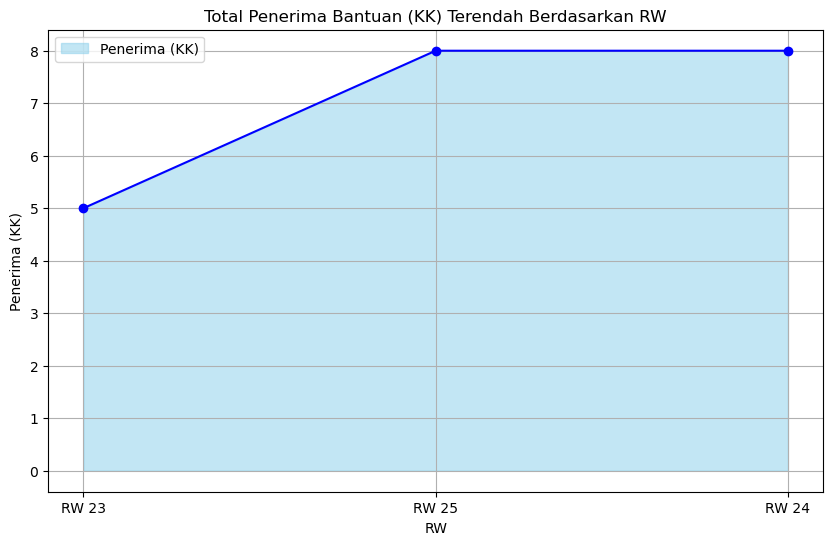

In [69]:
import matplotlib.pyplot as plt
grouped_data = df.groupby('RW')['Penerima (KK)'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='Penerima (KK)', ascending=True)
low_rw = sorted_data.head(3)


plt.figure(figsize=(10, 6), facecolor='#FFFFFF')
plt.fill_between(low_rw['RW'], low_rw['Penerima (KK)'], color='skyblue', alpha=0.5, label='Penerima (KK)')
plt.plot(low_rw['RW'], low_rw['Penerima (KK)'], marker='o', color='blue')
plt.xlabel('RW')
plt.ylabel('Penerima (KK)')
plt.title('Total Penerima Bantuan (KK) Terendah Berdasarkan RW')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()

Based on the data, it can be seen that the lowest number of recipients based on RW is RW 23 with 0.43% of households and RW 24 and RW 25 have the same number of recipients, which is 0.68% of total recipients (KK).

## 25-10-2023

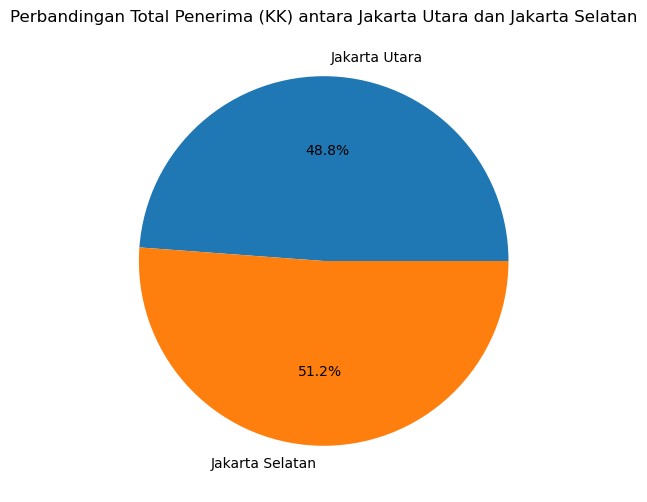

In [70]:
jakarta_utara = df[df['Wilayah Kota'] == 'JAKARTA UTARA']
jakarta_selatan = df[df['Wilayah Kota'] == 'JAKARTA SELATAN']

total_utara = jakarta_utara['Penerima (KK)'].sum()
total_selatan = jakarta_selatan['Penerima (KK)'].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_utara, total_selatan], labels=['Jakarta Utara', 'Jakarta Selatan'], autopct='%1.1f%%')
plt.title('Perbandingan Total Penerima (KK) antara Jakarta Utara dan Jakarta Selatan')
plt.show()

From the data above, the recipients of assistance between two regions, namely North Jakarta and South Jakarta. shows a comparison of the percentage of total recipients (KK) in the two regions.
From this visualization, we can see. (South Jakarta) is larger, which means South Jakarta has more recipients (KK) than North Jakarta.

Percentage of North Jakarta = (0.488 / 1) * 100 = 48.8%

Percentage of South Jakarta = (0.512/1) * 100 = 51.2%

In [71]:
total_per_wilayah = df.groupby('Wilayah Kota')['Penerima (KK)'].sum()
total_per_wilayah = total_per_wilayah.sort_values(ascending=False)

print(total_per_wilayah)

Wilayah Kota
JAKARTA TIMUR        326772.0
JAKARTA BARAT        258828.0
JAKARTA SELATAN      229198.0
JAKARTA UTARA        218705.0
JAKARTA PUSAT        121968.0
 KEPULAUAN SERIBU      4938.0
Name: Penerima (KK), dtype: float64


In [72]:
sembako_distribution = df['Sembako'].str.split(', ').explode()
total_sembako_per_jenis = sembako_distribution.value_counts()

print(total_sembako_per_jenis)

beras 5kg           2693
biskuit 2 pc        2693
masker 2pc          2693
sabun 2pc           2693
minyak 0,9l / 1L    2693
sarden 2 kaleng     2693
Name: Sembako, dtype: int64


In [73]:
total_per_kelurahan = df.groupby('Kelurahan')['Penerima (KK)'].sum()
total_per_kelurahan = total_per_kelurahan.sort_values(ascending=False)

print(total_per_kelurahan)

Kelurahan
Kapuk             21869.0
Penjaringan       18186.0
Jatinegara        15291.0
Kali baru         14905.0
Penggilingan      14768.0
                   ...   
Senayan             175.0
Karet Semanggi      172.0
Selong              139.0
Gondangdia           44.0
Melawai              27.0
Name: Penerima (KK), Length: 267, dtype: float64


In [74]:
total_per_kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum()
total_per_kecamatan = total_per_kecamatan.sort_values()
kecamatan_terendah = total_per_kecamatan.head(5)

print(kecamatan_terendah)

Kecamatan
Gambir                272.0
Kuningan              902.0
Grogol Petamburan    1443.0
Kabayoran Lama       4030.0
Matraman             4061.0
Name: Penerima (KK), dtype: float64


In [75]:
total_penerima_KK = df['Penerima (KK)'].sum()
total_penerima_KK

1160409.0

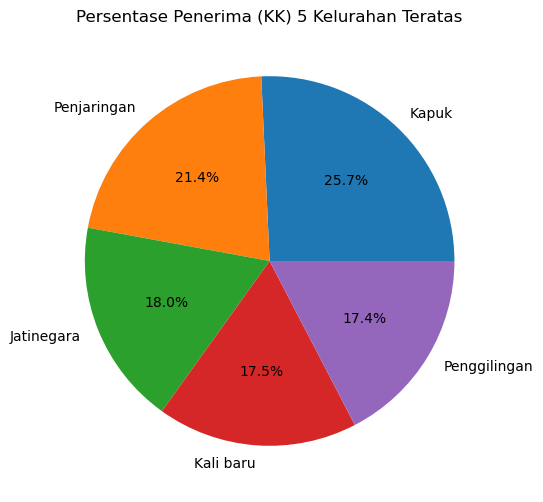

In [76]:
import matplotlib.pyplot as plt

total_per_kelurahan = df.groupby('Kelurahan')['Penerima (KK)'].sum()
total_per_kelurahan = total_per_kelurahan.sort_values(ascending=False)
top_5_kelurahan = total_per_kelurahan.head(5)

plt.figure(figsize=(6, 6))
plt.pie(top_5_kelurahan, labels=top_5_kelurahan.index, autopct='%1.1f%%')
plt.title('Persentase Penerima (KK) 5 Kelurahan Teratas')
plt.show()


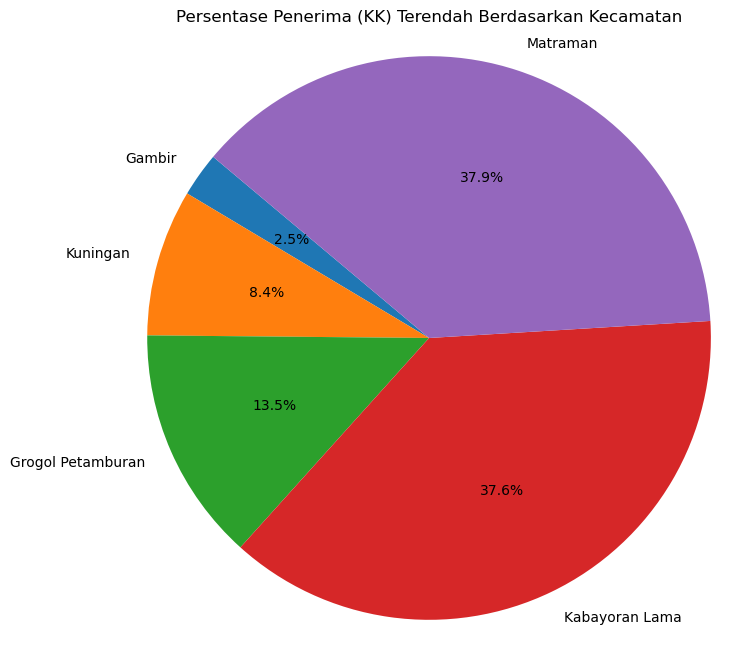

In [77]:
import matplotlib.pyplot as plt

grouped_data = df.groupby('Kecamatan')['Penerima (KK)'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='Penerima (KK)', ascending=True)
low_5_kecamatan = sorted_data.head(5)


plt.figure(figsize=(8, 8))
plt.pie(low_5_kecamatan['Penerima (KK)'], labels=low_5_kecamatan['Kecamatan'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Persentase Penerima (KK) Terendah Berdasarkan Kecamatan')
plt.show()


Based on the data, it is known that there are 5 lowest sub-districts with the least number of recipients (KK), namely Gambir Subdistrict as much as 2.5% calculated from the total number of recipients (KK) based on the sub-district. This shows that Kecamatan Gambir has a relatively lower level of assistance (KK) than other kecamatan in the region

In [78]:
total_semua_kecamatan = df.groupby('Kecamatan')['Penerima (KK)'].sum().sum()
print(f"Total Penerima (KK) untuk Semua Kecamatan: {total_semua_kecamatan}")

Total Penerima (KK) untuk Semua Kecamatan: 1160409.0


## 26-10-2023

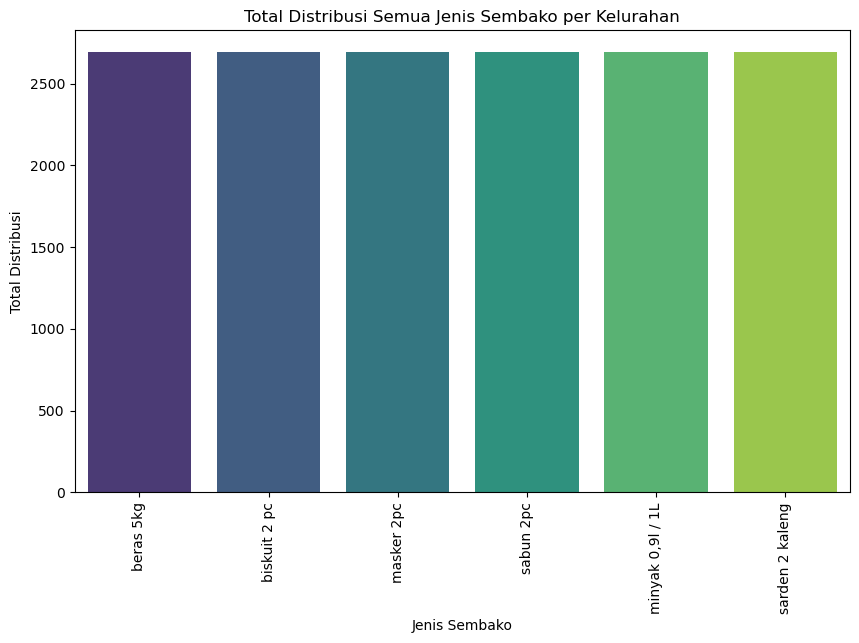

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns


sembako_distribution = df['Sembako'].str.split(', ').explode().value_counts()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sembako_distribution.index, y=sembako_distribution.values, palette='viridis')
plt.title('Total Distribusi Semua Jenis Sembako per Kelurahan')
plt.xlabel('Jenis Sembako')
plt.ylabel('Total Distribusi')
plt.xticks(rotation=90)
plt.show()

Based on the data above, it can be seen that the types of food are distributed equally. such as rice, biscuits, masks, soap, oil and canned sardines

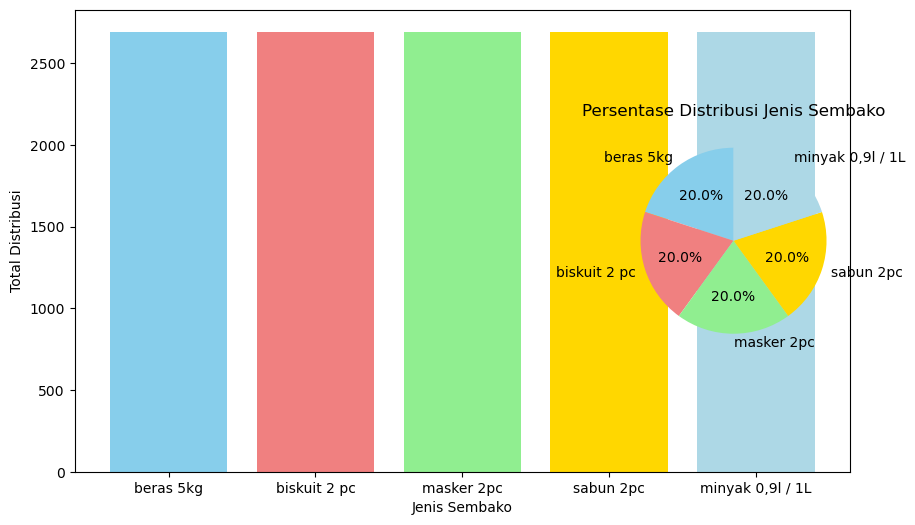

In [80]:
import matplotlib.pyplot as plt

sembako_distribution = df['Sembako'].str.split(', ').explode().value_counts()
top_5_sembako = sembako_distribution.head(5)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightblue']

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.inset_axes([0.7, 0, 0.3, 1])


ax1.bar(top_5_sembako.index, top_5_sembako.values, color=colors)
ax1.set_xlabel('Jenis Sembako')
ax1.set_ylabel('Total Distribusi')
ax2.pie(top_5_sembako, labels=top_5_sembako.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Persentase Distribusi Jenis Sembako')

plt.show()


• Percentage visualization of the food type distribution

Based on the data, this shows that over a given period, the distribution of groceries is distributed evenly between these types of groceries. Each type of food has an equally important contribution to social aid programs, covering basic food and public health needs.

## Thank you